In [371]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from statistics import mean, median
from scipy import stats
from scipy.stats import sem, ttest_ind

In [372]:
import numpy as np
import pandas as pd

In [373]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [374]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [375]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [376]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [377]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [378]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [379]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [380]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [381]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [382]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [383]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [384]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)


2016-08-23


In [385]:
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= query_date).all()

#prcp_data





In [386]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp_data, columns=['dates', 'precipitation'])
prcp_df
#prcp_df2 = prcp_df.set_index("dates", inplace=True)
prcp_df2 = prcp_df.dropna(how='any')
prcp_df2.head()


,dates,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


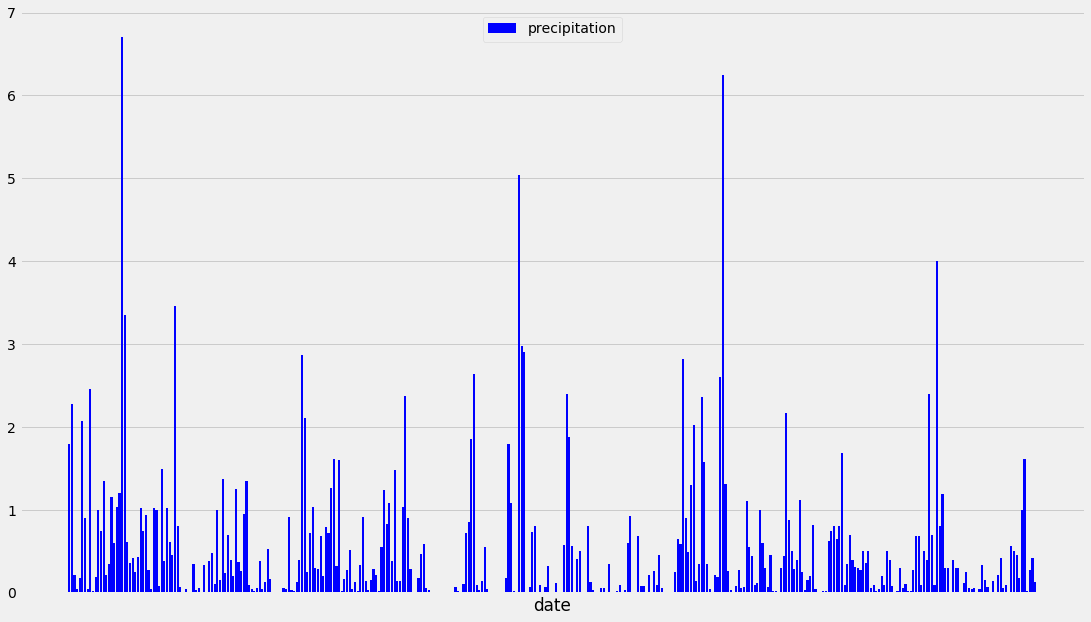

In [387]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(17)
ax.get_xaxis().set_ticks([])
plt.xlabel("date")
ax.bar(prcp_df2['dates'], prcp_df2['precipitation'], color = "blue", label="precipitation")
ax.grid(True)
ax.legend(loc="upper center")

![precipitation](Images/precipitation.png)

In [388]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df2.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [389]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [390]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
hm_df = pd.read_csv("Resources/hawaii_measurements.csv")
hm_df

sel = [Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
station_data = session.query(*sel).all()
station_data

station_df = pd.DataFrame(station_data, columns=['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
station_df

merge_table = pd.merge(station_df, hm_df, on="station")
merge_table

grouped_station = merge_table.groupby(['station'])
grouped_station.count().head(10)

grouped_station["station"].count().sort_values(ascending=False)

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [391]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


df519281 = merge_table.loc[merge_table["station"] == "USC00519281", :]
df519281.set_index("station", inplace=True)

#prcp_df2 = prcp_df.set_index("dates", inplace=True)
min_temp = df519281["tobs"].min()
max_temp = df519281["tobs"].max()
avg_temp = df519281["tobs"].mean()

print(min_temp, max_temp, avg_temp)




54 85 71.66378066378067


In [392]:
min_date = df519281["date"].min()
max_date = df519281["date"].max()
print(min_date, max_date)

2010-01-01 2017-08-18


In [393]:
start_date = '2016-08-18'
end_date = '2017-08-18'
mask = (df519281['date'] >= start_date) & (df519281['date'] <= end_date)
df519281_12 = df519281.loc[mask]
df519281_12.head()




,id,name,latitude,longitude,elevation,date,prcp,tobs
station,,,,,,,,
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-18,0.00,80
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-19,0.31,79
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-20,0.13,81
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-21,0.08,79
USC00519281,7,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2016-08-22,2.32,78


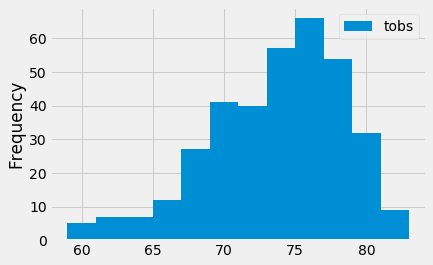

In [394]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Create the bins in which Data will be held

x_axis = df519281_12["tobs"].values
plt.hist(x_axis, bins=12, label="tobs")
plt.ylabel("Frequency")
plt.legend()


![precipitation](Images/station-histogram.png)

In [395]:
# just doing some testing here for the flask app, please ignore

#session = Session(engine)
#results = session.query(Measurement.date, Measurement.prcp).\
        #filter(Measurement.date >= dt.date(2016, 8, 23)).all()


#results

#precipitation = []
#for date, prcp in results:
    #prcp_dict = {}
    #prcp_dict["date"] = date
    #prcp_dict["precipitation"] = prcp
    #precipitation.append(prcp_dict)
   
# --------------------------------------------------------------------------------------------------------------

#import os
#import csv
#csvpath = ('Resources\hawaii_measurements.csv')

#session = Session(engine)
#results = session.query(Station.name, Station.station).all()

# Convert list of tuples into normal list
#all_names = (results)
#print(all_names)

#with open(csvpath, newline='') as csvfile:
    
    #CSV reader specifies delimiter and variable that holds contents
    #csvreader = csv.reader(csvfile, delimiter=',')

    #print(csvreader)

    #Read the header row first (skip this step if there is now header)
    #csv_header = next(csvreader)
    #print(f"CSV Header: {csv_header}")
    
    #tobs = []
     # Read each row of data after the header
    #for row in csvreader:
        #print(row)
        #print(dt.datetime.strptime(row[1], '%Y-%m-%d'))
        #if dt.datetime.strptime(row[1], '%Y-%m-%d') >= dt.datetime(2016,8,18):
            #tobs_dict = {}
            #tobs_dict["date"] = row[1]
            #tobs_dict["tobs"] = row[3]
            #tobs.append(tobs_dict)
        
#station_name = session.query(Station.name).\
           #filter(row[0]==Station.station).all()

#print(station_name)

# ------------------------------------------------------------------------------------------------------------

#import os
#import csv
#from statistics import mean, median
#import datetime as dt
#csvpath = ('Resources\hawaii_measurements.csv')

#with open(csvpath, newline='') as csvfile:

    # CSV reader specifies delimiter and variable that holds contents
    #csvreader = csv.reader(csvfile, delimiter=',')

    # Read the header row first (skip this step if there is now header)
    #csv_header = next(csvreader)
           
    #temp_stats = {}
    #temp_calc = []
    #start_date = "2017-8-20"
    #x = dt.datetime.strptime(start_date, '%Y-%m-%d' )
    #print(x)
        
    # Read each row of data after the header
    #for row in csvreader:
        #print(row)
        #if (dt.datetime.strptime(row[1], '%Y-%m-%d') >= dt.datetime.strptime(start_date, '%Y-%m-%d' )):
            #print(row[1])
           # temp_calc.append(int(row[3]))
    #print(temp_calc)
    #max_temp = max(temp_calc)
    #min_temp = min(temp_calc)
    #mean_temp = mean(temp_calc)
    #temp_stats.update({"max_temp": max_temp, "min_temp": min_temp, "mean":mean_temp})
    
  
    #print(temp_stats)



In [396]:
# Optional Analysis - Temperature Analysis I
#hm_df
hm_df_sorted = hm_df.sort_values("date")
hm_df_sorted

hm_df_sorted['date'] = pd.to_datetime(hm_df_sorted['date'],format="%Y/%m/%d")
hm_df_sorted['date'].dtype
        
hm_df_sorted['month_of_date'] = hm_df_sorted['date'].dt.month
hm_df_sorted

grouped_hm_df_sorted = hm_df_sorted.groupby(['month_of_date'])

avg_temp_df = pd.DataFrame(grouped_hm_df_sorted.mean().head(12))
avg_temp_df
avg_temp_june = float(avg_temp_df.loc[6, "tobs"])
avg_temp_dec = float(avg_temp_df.loc[12, "tobs"])
print(f"The average temperature in June is {avg_temp_june} and the averge temperature in December is {avg_temp_dec}")

hm_df_sorted
hm_df_sorted2 = hm_df_sorted.dropna(how='any')

cat1 = hm_df_sorted2[hm_df_sorted2['month_of_date']==6]
cat2 = hm_df_sorted2[hm_df_sorted2['month_of_date']==12]


ttest_ind(cat1['tobs'], cat2['tobs'])

#You would use a paired t-test because the samples in the different months are taken from the same set of stations.
#Based on the p-value, the differences between the average temperature in june and december are not significant.

The average temperature in June is 74.94411764705882 and the averge temperature in December is 71.04152933421226


Ttest_indResult(statistic=30.865349991562194, pvalue=9.8415346259008e-182)

In [397]:
def calc_temps(start_date, end_date):

    sd = dt.datetime.strptime(start_date, '%Y-%m-%d')
    ed = dt.datetime.strptime(end_date, '%Y-%m-%d')

    hm2 = pd.DataFrame(hm_df_sorted[['date','tobs']])
    hm2['date'] = pd.to_datetime(hm2['date'],format="%Y/%m/%d")

    hm3 = pd.DataFrame(hm2.loc[(hm2["date"] >= sd) & (hm2["date"] <= ed), : ])

    hm3_min = hm3["tobs"].min()
    hm3_max = hm3["tobs"].max()
    hm3_mean = hm3["tobs"].mean()
    stats_dict = {"Min": hm3_min, "Max": hm3_max, "Avg": hm3_mean}
    return stats_dict



In [398]:
#function usage example
# will use these as my trip dates
calc_temps('2012-02-28', '2012-03-05')

{'Min': 62, 'Max': 74, 'Avg': 69.57142857142857}

In [399]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2011-02-28', '2011-03-05')

{'Min': 61, 'Max': 75, 'Avg': 69.75510204081633}

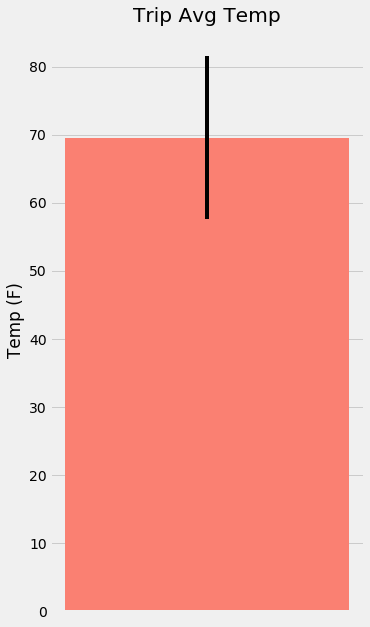

In [400]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(5)
ax.get_xaxis().set_ticks([])
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
error = 74-62
ax.bar("2012-02-28 to 2012-03-05", 69.57142857142857, color = "salmon", yerr=error)
ax.grid(True)


In [401]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
him = pd.read_csv("Resources/hawaii_measurements.csv")
his = pd.read_csv("Resources/hawaii_stations.csv")

hawaii_merge = pd.merge(him, his, on="station")
hawaii_merge
hawaii_merge['date'] = pd.to_datetime(hawaii_merge['date'],format="%Y/%m/%d")

td1 = dt.datetime.strptime("2011-02-28", '%Y-%m-%d')
td2 = dt.datetime.strptime("2011-03-05", '%Y-%m-%d')

hawaii_merge2 = pd.DataFrame(hawaii_merge.loc[(hawaii_merge["date"] >= td1) & (hawaii_merge["date"] <= td2), : ])
hawaii_merge2

hawaii_merge3 = pd.DataFrame(hawaii_merge2.groupby("station").sum().head(12)).sort_values("prcp", ascending=False)
hawaii_merge3

hawaii_name = pd.DataFrame(his[["station","name"]])
hawaii_name
hawaii_merge4 = pd.merge(hawaii_merge3, hawaii_name, on="station")
hawaii_merge4
hawaii_final = pd.DataFrame(hawaii_merge4[['station', 'name', 'prcp', 'latitude', 'longitude', 'name']])
hawaii_final

,station,name,prcp,latitude,longitude,name
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",2.33,107.49600,-790.05550,"UPPER WAHIAWA 874.3, HI US"
1,USC00519281,"WAIHEE 837.5, HI US",2.23,128.71002,-947.09334,"WAIHEE 837.5, HI US"
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2.19,128.01336,-946.26834,"WAIMANALO EXPERIMENTAL FARM, HI US"
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.96,129.12780,-947.02440,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",1.45,127.99860,-946.81500,"MANOA LYON ARBO 785.2, HI US"
5,USC00513117,"KANEOHE 838.1, HI US",1.44,128.54040,-946.80900,"KANEOHE 838.1, HI US"
6,USC00519397,"WAIKIKI 717.2, HI US",1.38,127.62960,-946.90080,"WAIKIKI 717.2, HI US"
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.63,106.57600,-789.99600,"HONOLULU OBSERVATORY 702.2, HI US"
8,USC00517948,"PEARL CITY, HI US",0.00,64.18020,-473.92530,"PEARL CITY, HI US"


## Optional Challenge Assignment

In [402]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    #Args:
       # date (str): A date string in the format '%m-%d'
        
   # Returns:
       # A list of tuples containing the daily normals, tmin, tavg, and tmax
    
   # """
    


    him2 = pd.read_csv("Resources/hawaii_measurements.csv")
    him3 = pd.DataFrame(him2[['date','tobs']])
    month_day
    him3
    

    him4 = pd.DataFrame(him3.loc[him3["date"].str.contains(date)])
    him4
    dnmin = him4["tobs"].min()
    dnmax = him4["tobs"].max()
    dnmean = him4["tobs"].mean()
    
    return(dnmin, dnmax, dnmean)
    
    
    

    
daily_normals("01-01")

(62, 77, 69.15384615384616)

In [403]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
sd_dn = "2011-02-28"
ed_dn = "2011-03-05"

# Use the start and end date to create a range of dates
date_list = pd.date_range(start=sd_dn, end=ed_dn)
date_list
# Stip off the year and save a list of %m-%d strings
stip_list = ["02-28", "03-01", "03-02", "03-03", "03-04", "03-05"]
normals = []
for i in stip_list:
    a = daily_normals(i)
    normals.append(a)
normals
# Loop through the list of %m-%d strings and calculate the normals for each date


[(65, 80, 70.65517241379311),
 (64, 76, 70.0327868852459),
 (61, 78, 70.36666666666666),
 (60, 78, 70.06896551724138),
 (57, 77, 69.27272727272727),
 (60, 76, 67.89090909090909)]

In [404]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=['tmin', 'tmax', 'tavg'])
normals_df["date"] = date_list
normals_df
normals_df.set_index("date", inplace=True)
normals_df

,tmin,tmax,tavg
date,,,
2011-02-28,65,80,70.655172
2011-03-01,64,76,70.032787
2011-03-02,61,78,70.366667
2011-03-03,60,78,70.068966
2011-03-04,57,77,69.272727
2011-03-05,60,76,67.890909


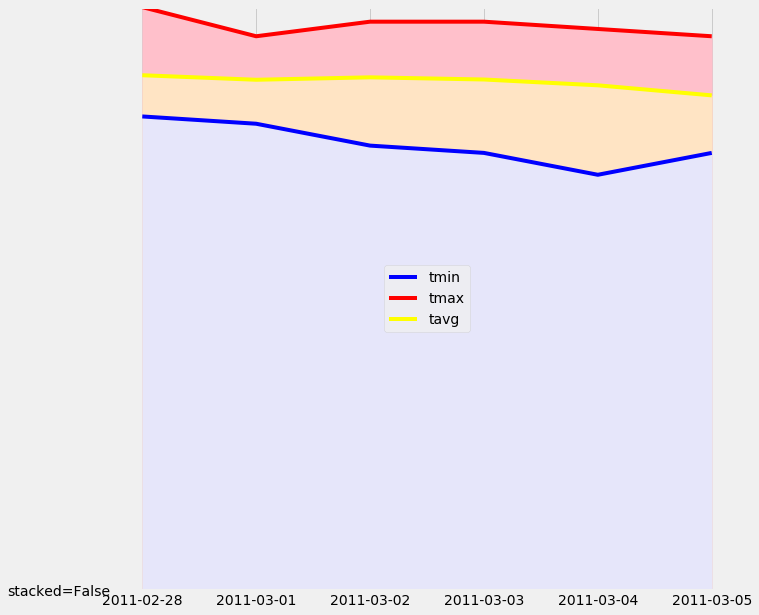

In [405]:
# Plot the daily normals as an area plot with `stacked=False`

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

x = normals_df.index.values
y1 = normals_df["tmin"]
y2 = normals_df["tmax"]
y3 = normals_df["tavg"]


fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)

ax.plot(x,y1, color="blue", label="tmin")


ax.plot(x,y2, color="red", label="tmax")
plt.fill_between(x, y2, "stacked=False", color="pink")

ax.plot(x,y3, color="yellow", label="tavg")

plt.fill_between(x, y3, "stacked=False", color="bisque")
plt.fill_between(x, y1, "stacked=False", color="lavender")
plt.ylim(0,80)
ax.legend(loc='center')
ax.grid(True)